In [187]:
import torch
from monai.transforms import (
    Compose,
    LoadImaged,
    Lambdad,
    NormalizeIntensityd,
    EnsureTyped,
    RandSpatialCropd,
    RandAffined,
    RandGaussianNoised,
    RandGaussianSmoothd,
    RandScaleIntensityd,
    RandShiftIntensityd,
    RandFlipd,
)
import matplotlib.pyplot as plt

In [188]:
datalist = {
    "image": "/Volumes/T7/data/FIVES/train/Original/1_A.png",
    "label": "/Volumes/T7/data/FIVES/train/Ground truth/1_A.png",
}

# Deterministic transforms
deterministic_transforms = [
    LoadImaged(keys=["image", "label"], image_only=True, ensure_channel_first=True),
    Lambdad(keys="label", func=lambda x: x[0:1, ...] / 255),
    NormalizeIntensityd(keys="image", nonzero=True, channel_wise=True),
    EnsureTyped(keys=["image", "label"], dtype=[torch.float32, torch.uint8]),
]

# Random transforms
roi_size = (512, 512)
random_transforms = [
    RandSpatialCropd(keys=["image", "label"], roi_size=roi_size, random_size=False),
    RandAffined(
        keys=["image", "label"],
        prob=0.2,
        spatial_size=roi_size,
        rotate_range=[0.26, 0.26],
        scale_range=[0.2, 0.2],
        mode=["bilinear", "nearest"],
        cache_grid=True,
        padding_mode="border",
    ),
    RandGaussianNoised(keys="image", prob=0.2, mean=0.0, std=0.1),
    RandGaussianSmoothd(keys="image", prob=0.2, sigma_x=[0.5, 1.0], sigma_y=[0.5, 1.0]),
    RandScaleIntensityd(keys="image", prob=0.2, factors=0.3),
    RandShiftIntensityd(keys="image", prob=0.2, offsets=0.1),
    RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=0),
    RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=1),
]

# Define preprocessing pipelines
train_preprocessing = Compose(deterministic_transforms + random_transforms)
val_preprocessing = Compose(deterministic_transforms)


train_data = val_preprocessing(datalist)

image, label = train_data["image"], train_data["label"]

In [189]:
image.shape, label.shape

(torch.Size([3, 2048, 2048]), torch.Size([1, 2048, 2048]))

In [190]:
label.unique()

metatensor([0, 1], dtype=torch.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6000385..12.767951].


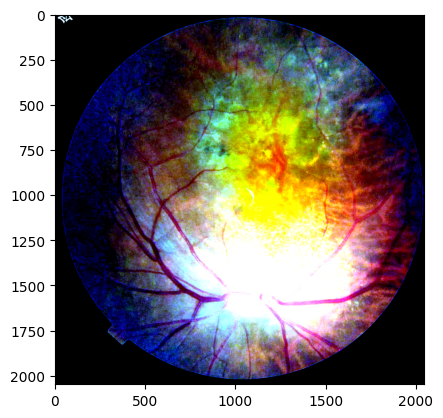

In [191]:
plt.imshow(image.permute(1, 2, 0))

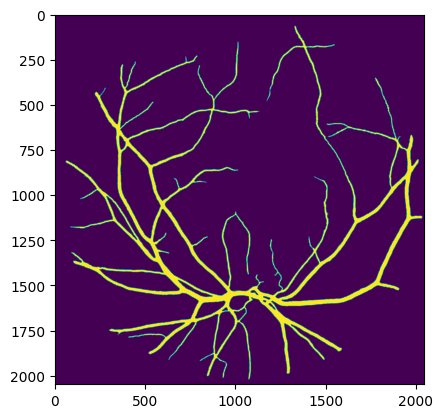

In [192]:
plt.imshow(label.permute(1, 2, 0))